# Erasmus Neural Networks
http://michalbereta.pl/nn
## Multi Layer Perceptron with one hidden layer


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Multi Layer Perceptron for MSE - one hidden layer with sigmoidal activation 

In [3]:
import numpy as np

class MLP1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector
#        limit1 = 4*np.sqrt(6.0/(inputs_num+hidden_num))
#        self.W1 = -limit1 + 2*limit1*np.random.rand(inputs_num, hidden_num) #neurons as columns        
#        limit2 = 4*np.sqrt(6.0/(hidden_num+outputs_num))
#        self.W2 = -limit2 + 2*limit2*np.random.rand(hidden_num, outputs_num) #neurons as columns
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        self.outs = np.dot(self.hout, self.W2) + self.b2
    def TestClassification(self, X, ClsIndx):
        self.Forward(X)
        ex_num = X.shape[0]
        #classification error
        predictions = np.argmax(self.outs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (error_rate, errors_num)
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, D):
        self.mse = np.linalg.norm(self.outs - D, axis=1).sum()/D.shape[0]
        return self.mse
    def LearnClassification(self, X, ClsIndx, lrate):
        pass
    def Update(self, X, D, lrate):
        #self.Forward(X)
        #gradients of outputs 
        ex_num = X.shape[0]
        dY = self.outs - D
        dY /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dY) # chain rule to calculate gradients
        db2 = np.sum(dY, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dY, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1
    def Learn(self, X, D, epochs, lrate):
        self.stats = []
        self.Forward(X)
        for i in range(epochs):
            self.Update(X, D, lrate)
            self.Forward(X)
            self.stats.append(self.GetMSE(D))


<IPython.core.display.Javascript object>


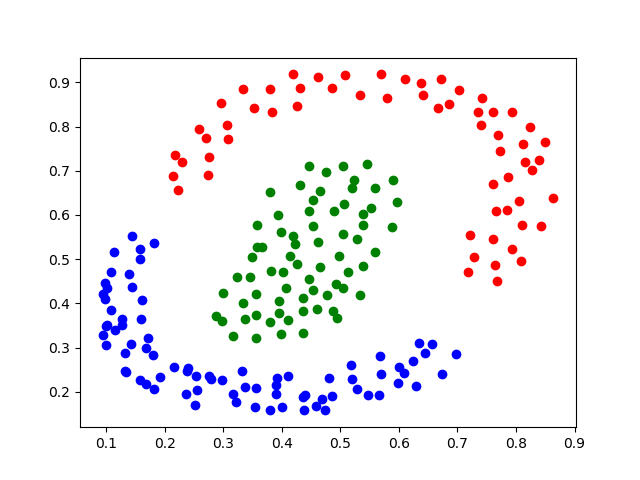

num_of_cls= 3
num_of_ins= 2
Predictions before training= [2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1
 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
MSE= 1.6581416557004682
classification errors= 141

Predictions after training= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
MSE= 0.51

<IPython.core.display.Javascript object>


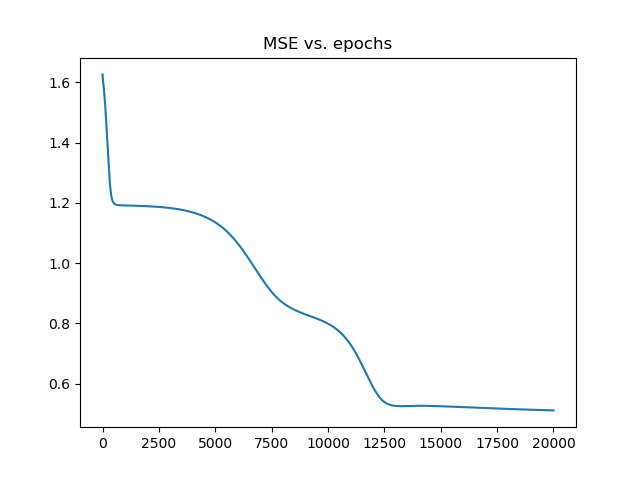

<IPython.core.display.Javascript object>


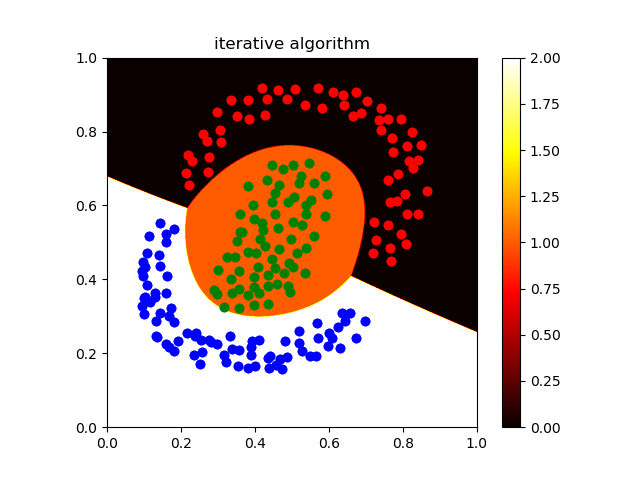

In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt



%matplotlib notebook

###############################################################################
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels
###############################################################################    
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]


plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()


num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

dtrain = encode_labels_as_binary(d, num_of_cls)
#print('dtrain=',dtrain)

net = MLP1HL(num_of_ins, num_of_cls, 20)

Y = net.Forward(X)
#print('Y=',Y)
predictions = net.GetPredictions()
print('Predictions before training=',predictions)
print('MSE=',net.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))


##########################################################################

net.Learn(X, dtrain, 20000, 0.1)

Y = net.Forward(X)
#print('Y=',Y)
predictions = net.GetPredictions()
print()
print('Predictions after training=',predictions)
print('MSE=',net.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))


##########################################################################
plt.figure()
plt.plot(net.stats)
plt.title('MSE vs. epochs')
plt.show()
##########################################################################
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('iterative algorithm')

plt.show()
##########################################################################

### Multi Layer Perceptron for Sofmax - one hidden layer with sigmoidal activation 

In [5]:
import numpy as np

class SoftMax1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector        
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        f = np.dot(self.hout, self.W2) + self.b2
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
        return self.probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Update(self, X, ClsIndx, lrate): 
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dprobs) # chain rule to calculate gradients
        db2 = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dprobs, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1       
    def Learn(self, X, ClsIndx, epochs, lrate):
        self.Forward(X)
        self.stats = []
        for i in range(epochs):
            self.Update(X, ClsIndx, lrate)
#            self.Forward(X) #not needed if self.Test() is called
            self.stats.append(self.Test(X, ClsIndx)[0])


num_of_cls= 3
num_of_ins= 2
Predictions before training= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2
 2 2 2 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
Loss= 1.0939153605573533
classification errors= 115

Predictions after training= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Loss= 0.

<IPython.core.display.Javascript object>


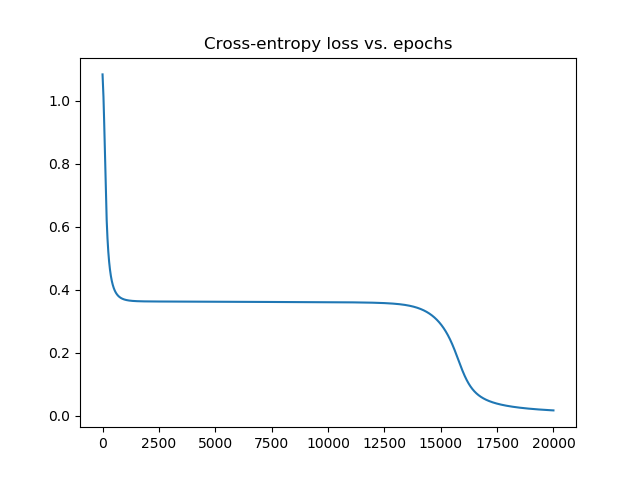

<IPython.core.display.Javascript object>


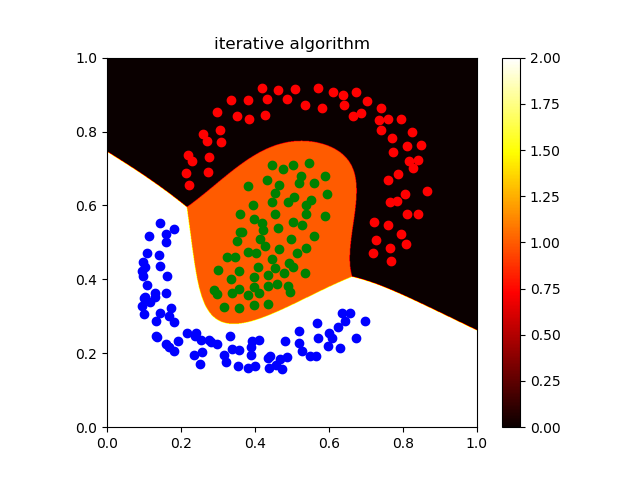

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


###############################################################################    
X = np.loadtxt('data_3classes_nonlinear_2D.txt')
#X = np.loadtxt('data_3classes_nonlinear_2D_2.txt')
#print('X=',X)

d = X[:,-1].astype('int')
X = X[:,:-1]


plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()


num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)


net = SoftMax1HL(num_of_ins, num_of_cls, 20)

Y = net.Forward(X)
#print('Y=',Y)
predictions = net.GetPredictions()
print('Predictions before training=',predictions)
print('Loss=',net.Test(X, d)[0])
print('classification errors=',np.sum(d!=predictions))

##########################################################################

net.Learn(X, d, 20000, 0.5)

Y = net.Forward(X)
#print('Y=',Y)
predictions = net.GetPredictions()
print()
print('Predictions after training=',predictions)
print('Loss=',net.Test(X,d)[0])
print('classification errors=',np.sum(d!=predictions))


##########################################################################
plt.figure()
plt.plot(net.stats)
plt.title('Cross-entropy loss vs. epochs')
plt.show()
##########################################################################
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)
xx = _X.reshape(-1,1)
yy = _Y.reshape(-1,1)
net.Forward(np.hstack((xx, yy)))
Z = net.GetPredictions().reshape(_X.shape)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('iterative algorithm')

plt.show()
##########################################################################



### Task 1

- Use cross-validation to select the best settings for MLP and SoftMax networks (1 hidden layer) for pima and sonar databases.

- Compare the results with linear models (Widrow-Hoff and SoftMax with no hidden layers - use code from previous notebooks).

#### YOUR ANSWERS HERE
The results are better on the hidden layer models rather than the linear ones, specially on the sonar database.

In [11]:
import numpy as np

class MLP1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector
#        limit1 = 4*np.sqrt(6.0/(inputs_num+hidden_num))
#        self.W1 = -limit1 + 2*limit1*np.random.rand(inputs_num, hidden_num) #neurons as columns        
#        limit2 = 4*np.sqrt(6.0/(hidden_num+outputs_num))
#        self.W2 = -limit2 + 2*limit2*np.random.rand(hidden_num, outputs_num) #neurons as columns
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        self.outs = np.dot(self.hout, self.W2) + self.b2
    def TestClassification(self, X, ClsIndx):
        self.Forward(X)
        ex_num = X.shape[0]
        #classification error
        predictions = np.argmax(self.outs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (error_rate, errors_num)
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, D):
        self.mse = np.linalg.norm(self.outs - D, axis=1).sum()/D.shape[0]
        return self.mse
    def LearnClassification(self, X, ClsIndx, lrate):
        pass
    def Update(self, X, D, lrate):
        #self.Forward(X)
        #gradients of outputs 
        ex_num = X.shape[0]
        dY = self.outs - D
        dY /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dY) # chain rule to calculate gradients
        db2 = np.sum(dY, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dY, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1
    def Learn(self, X, D):
        dtrain = encode_labels_as_binary(D, self.onum)
        self.stats = []
        self.Forward(X)
        for i in range(self.epochs):
            self.Update(X, dtrain, self.lrate)
            self.Forward(X)
            self.stats.append(self.GetMSE(dtrain))
###############################################################################
class SoftMax1HL:
    def __init__(self, inputs_num, outputs_num, hidden_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num, outputs_num))/np.sqrt(hidden_num) #neurons as columns
        self.b2 = np.zeros((1, outputs_num)) #horizontal vector        
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u = np.dot(X, self.W1) + self.b1
        self.hout = 1.0/(1.0 + np.exp(-self.u))
        f = np.dot(self.hout, self.W2) + self.b2
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
        return self.probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Update(self, X, ClsIndx, lrate): 
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW2 = np.dot(self.hout.T, dprobs) # chain rule to calculate gradients
        db2 = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W2 = self.W2 - lrate*dW2
        self.b2 = self.b2 - lrate*db2
        #gradient of weights and biases - hidden layer
        temp = np.dot(dprobs, self.W2.T)
        du = self.hout*(1 - self.hout)
        temp = temp * du  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons
        self.W1 = self.W1 - lrate*dW1
        self.b1 = self.b1 - lrate*db1       
    def Learn(self, X, ClsIndx):
        self.Forward(X)
        self.stats = []
        for i in range(self.epochs):
            self.Update(X, ClsIndx, self.lrate)
#            self.Forward(X) #not needed if self.Test() is called
            self.stats.append(self.Test(X, ClsIndx)[0])
###############################################################################
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.num_of_classes = num_of_classes
        self.w =  -1 + 2 * np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis = 1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis = 1).sum() / d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels != self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), d)
        print('w=', w)
        self.w = w[1:,:]
        self.b = w[0,:]
        print('w=', self.w)
        print('b=', self.b)
    def TrainIterative(self, X, d, labels, eta, max_iters):
        self.mse_stats = []
        Y = self.Forward(X)
        for i in range(max_iters):
            self.w += eta * np.dot(X.T, d - self.outs)
            self.b += eta * np.dot(np.ones((1, X.shape[0])), d - self.outs).flatten()
            Y = self.Forward(X)
            mse = self.GetMSE(d)
            self.mse_stats.append(mse)
            #print('mse=',mse)
            #classification_error = self.GetClassificationError(labels)
            #print('classification_error=',classification_error)
            #print()
    def Learn(self, X, labels):
        dtrain = encode_labels_as_binary(labels, self.num_of_classes)
        self.TrainIterative(X, dtrain, labels, self.eta, self.max_iters)

###########################################################################################################
class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
        self.max_epochs = 100
        self.eta_max = 0.1
        self.eta_min = 0.01
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Update(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
    def Learn(self, X, ClsIndx):
        for i in range(self.max_epochs):
            eta = self.eta_max - (self.eta_max - self.eta_min)*float(i)/self.max_epochs
#            print('iteration ',i+1, 'eta=',eta)
            self.Update(X, ClsIndx, eta)       
     
##########################################################################
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1 * np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows), d.T] = 1
    return labels

def encode_str_labels(d):
    labels = list(set(d))
    for i in range(len(d)):
        d[i] = labels.index(d[i])
    return d
##########################################################################
def generate_mlp1hl(inputs_num, outputs_num):
    mlp1hl = MLP1HL(inputs_num, outputs_num, 19)
    mlp1hl.epochs = 20000
    mlp1hl.lrate = 0.1
    return mlp1hl
def generate_softmax1hl(inputs_num, outputs_num):
    softmax1hl = SoftMax1HL(inputs_num, outputs_num, 15)
    softmax1hl.epochs = 20000
    softmax1hl.lrate = 0.2
    return softmax1hl
def generate_mcperceptron(inputs_num, outputs_num):
    mcperc = MCPerceptron(outputs_num, inputs_num)
    mcperc.eta = 0.001
    mcperc.max_iters = 5000
    return mcperc
def generate_linear_softmax(inputs_num, outputs_num):
    softmax_model = SoftMaxLinear(inputs_num, outputs_num)
    softmax_model.eta_max = 0.1
    softmax_model.eta_min = 0.01
    softmax_model.max_epochs = 5000
    return softmax_model
############################################################################### 
def cross_validation(X, labels, model_generator, num_folds): 
    print('\nStarting cross-validation...')
    ex_num = X.shape[0] #number of examples
    inputs_num = X.shape[1]
    outputs_num = len(set(labels)) #number of classes
    #split data into num_folds parts
    indxs = np.random.randint(num_folds, size=ex_num)
    train_errors = []
    test_errors = []
    for i in range(num_folds):
        #create the current train and test sets
        trainX = X[indxs != i,:]
        train_labels = labels[indxs != i]
        testX = X[indxs == i,:]
        test_labels = labels[indxs == i]
        #get the model and train it
        print('Training model',i+1,'...')
        model = model_generator(inputs_num, outputs_num) #get a new model
        model.Learn(trainX, train_labels)
        #check the model on train data
        print('Checking the model on train data...')
        model.Forward(trainX)
        ans = model.GetPredictions()
        train_error_rate = (ans!=train_labels).sum()/trainX.shape[0]
        #check the model on test data
        print('Checking the model on test data...')
        model.Forward(testX)
        ans = model.GetPredictions()
        test_error_rate = (ans!=test_labels).sum()/testX.shape[0]
        train_errors.append(train_error_rate)
        test_errors.append(test_error_rate)
    train_errors = np.array(train_errors)
    test_errors = np.array(test_errors)
    stats = {}
    stats['train_errors'] = train_errors
    stats['test_errors'] = test_errors
    stats['train_error_mean'] = train_errors.mean()
    stats['test_error_mean'] = test_errors.mean()
    stats['train_error_std'] = train_errors.std()
    stats['test_error_std'] = test_errors.std()
    print('Cross-validation finished\n')
    return stats
###############################################################################

X_pima = np.loadtxt('pima-diabetes.csv', delimiter=",", dtype=str)

labels_pima = X_pima[:,-1].astype('int32')
X_pima = X_pima[:,:-1].astype(np.float)

X_sonar = np.loadtxt('sonar.csv', delimiter=",", dtype=str)

labels_sonar = X_sonar[:,-1].astype('str')
X_sonar = X_sonar[:,:-1].astype(np.float)
labels_sonar = encode_str_labels(labels_sonar).astype('int32')


print()
print("############# PIMA ############")
print()

xval = cross_validation(X_pima, labels_pima, generate_mlp1hl, 10)

print('Results for cross-validation MLP1HL:')
for key in xval:
    print(key, xval[key],'')

xval = cross_validation(X_pima, labels_pima, generate_softmax1hl, 10)

print('Results for cross-validation SoftMax1HL:')
for key in xval:
    print(key, xval[key],'')

xval = cross_validation(X_pima, labels_pima, generate_mcperceptron, 10)

print('Results for cross-validation MCPerceptron:')
for key in xval:
    print(key, xval[key],'')

xval = cross_validation(X_pima, labels_pima, generate_linear_softmax, 10)

print('Results for cross-validation LinearSoftmax:')
for key in xval:
    print(key, xval[key],'')



print()
print("############# SONAR ############")
print()

xval = cross_validation(X_sonar, labels_sonar, generate_mlp1hl, 10)

print('Results for cross-validation MLP1HL:')
for key in xval:
    print(key, xval[key],'')

xval = cross_validation(X_sonar, labels_sonar, generate_softmax1hl, 10)

print('Results for cross-validation SoftMax1HL:')
for key in xval:
    print(key, xval[key],'')

xval = cross_validation(X_sonar, labels_sonar, generate_mcperceptron, 10)

print('Results for cross-validation MCPerceptron:')
for key in xval:
    print(key, xval[key],'')

xval = cross_validation(X_sonar, labels_sonar, generate_linear_softmax, 10)

print('Results for cross-validation LinearSoftmax:')
for key in xval:
    print(key, xval[key],'')


############# PIMA ############


Starting cross-validation...
Training model 1 ...
Checking the model on train data...
Checking the model on test data...
Training model 2 ...
Checking the model on train data...
Checking the model on test data...
Training model 3 ...
Checking the model on train data...
Checking the model on test data...
Training model 4 ...
Checking the model on train data...
Checking the model on test data...
Training model 5 ...
Checking the model on train data...
Checking the model on test data...
Training model 6 ...
Checking the model on train data...
Checking the model on test data...
Training model 7 ...
Checking the model on train data...
Checking the model on test data...
Training model 8 ...
Checking the model on train data...
Checking the model on test data...
Training model 9 ...
Checking the model on train data...
Checking the model on test data...
Training model 10 ...
Checking the model on train data...
Checking the model on test data...
Cross-validatio

Checking the model on train data...
Checking the model on test data...
Training model 2 ...
Checking the model on train data...
Checking the model on test data...
Training model 3 ...
Checking the model on train data...
Checking the model on test data...
Training model 4 ...
Checking the model on train data...
Checking the model on test data...
Training model 5 ...
Checking the model on train data...
Checking the model on test data...
Training model 6 ...
Checking the model on train data...
Checking the model on test data...
Training model 7 ...
Checking the model on train data...
Checking the model on test data...
Training model 8 ...
Checking the model on train data...
Checking the model on test data...
Training model 9 ...
Checking the model on train data...
Checking the model on test data...
Training model 10 ...
Checking the model on train data...
Checking the model on test data...
Cross-validation finished

Results for cross-validation MCPerceptron:
train_errors [0.11734694 0.153

### Task 2

Not obligatory. Do it only if you want.


- Extend the implementations of MLP and SoftMax, so that there are two hidden layers.

- Demonstrate how they work on demo projects.

#### YOUR ANSWERS HERE
My results are as follows...

In [ ]:
#YOUR CODE HERE